In [35]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

## Load the data

In [36]:
mnist = tf.keras.datasets.mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = np.concatenate((X_train, X_test))
y_train = np.concatenate((Y_train, Y_test))
y_train = y_train.astype(int)

X_train.shape, y_train.shape

((70000, 28, 28), (70000,))

In [37]:
df = pd.DataFrame()
df['filename'] = [f'{i}.jpg' for i in range(X_train.shape[0])]
df['label'] = y_train
df.head()

,filename,label
0,0.jpg,5
1,1.jpg,0
2,2.jpg,4
3,3.jpg,1
4,4.jpg,9


In [38]:
image_path = 'Images/train/'

In [39]:
print(X_train.shape, y_train.shape)

(70000, 28, 28) (70000,)


## Exploratory Data Analysis

In [40]:
X = df.drop('label',axis =1)
y = df['label']

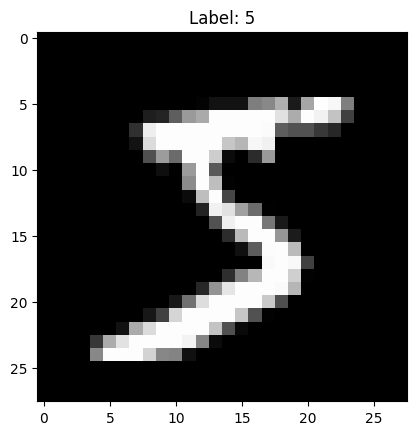

In [41]:
image_index = 0

plt.imshow(X_train[image_index], cmap='gray')
plt.title(f'Label: {y_train[image_index]}')
plt.show()

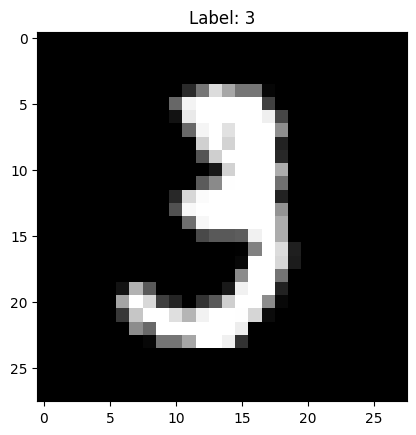

In [42]:
image_index = 10

plt.imshow(X_train[image_index], cmap='gray')
plt.title(f'Label: {y_train[image_index]}')
plt.show()

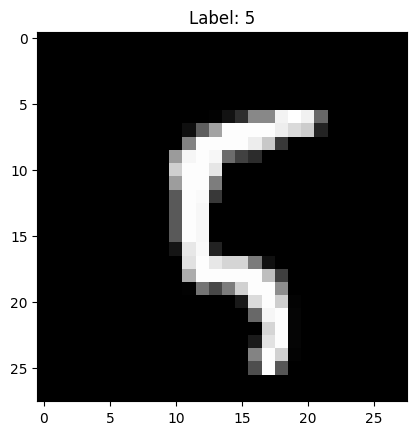

In [43]:
image_index = 100

plt.imshow(X_train[image_index], cmap='gray')
plt.title(f'Label: {y_train[image_index]}')
plt.show()

In [44]:
# x_train[0]

In [46]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [47]:
X_train.shape, X_test.shape

((70000, 28, 28), (10000, 28, 28))

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# define the model
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
# train the model
history = model.fit(x=X_train, y=y_train, batch_size=32, epochs=30, validation_data=(X_test, Y_test))

Epoch 1/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8894 - loss: 0.3609 - val_accuracy: 0.9821 - val_loss: 0.0579
Epoch 2/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9695 - loss: 0.1021 - val_accuracy: 0.9887 - val_loss: 0.0328
Epoch 3/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9789 - loss: 0.0650 - val_accuracy: 0.9923 - val_loss: 0.0255
Epoch 4/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9831 - loss: 0.0528 - val_accuracy: 0.9928 - val_loss: 0.0227
Epoch 5/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9865 - loss: 0.0419 - val_accuracy: 0.9964 - val_loss: 0.0123
Epoch 6/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9875 - loss: 0.0376 - val_accuracy: 0.9959 - val_loss: 0.0117
Epoch 7/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9891 - loss: 0.0316 - val_accuracy: 0.9973 - val_loss: 0.0075
Epoch 8/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9903 - loss: 0.0277 

In [50]:
from sklearn.metrics import accuracy_score


In [52]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)
accuracy_score(Y_test,y_pred)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


0.9998

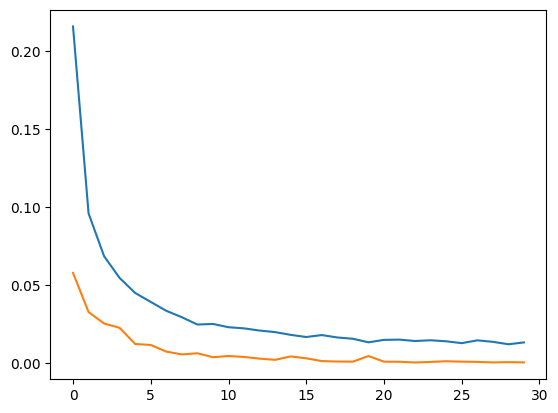

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

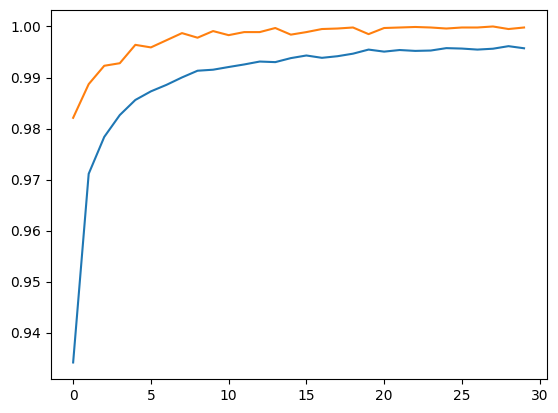

In [54]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

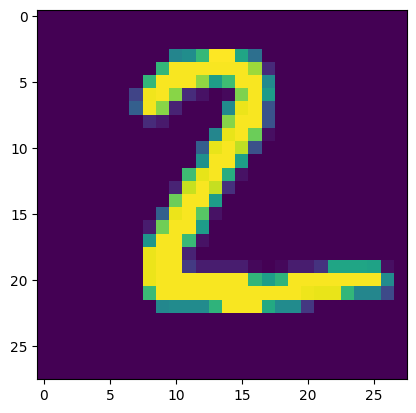

In [57]:
plt.imshow(X_test[1])


In [58]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


array([2])

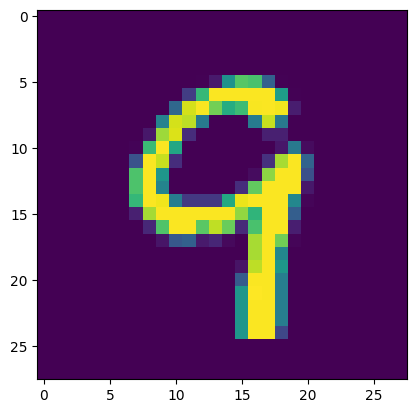

In [59]:
plt.imshow(X_test[150])


In [60]:
model.predict(X_test[150].reshape(1,28,28)).argmax(axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


array([9])